# Probability Distributions - a Recap 

## Introduction

In this lesson, we shall quickly revise and summarize the probability distribution functions for some common data distributions that we have seen so far, and will surely visit them again in a machine learning context. This lesson is aimed to help you wrap your head a little bit more around distributions and how to implement and visualize them in Python.

## Objectives
You will be able to:

* Describe the probability functions for Uniform, Exponential, Normal and Poisson distributions

* Generate data and plot a number of distributions using SciPy and Numpy

## Representing distributions

There are many ways to represent a probability distribution, we have seen probability mass functions for discrete data, or PMFs, and Probability Density Functions (PDFs), for continuous data. These function map from each possible outcome to its probability. PMF/PDF are among several representations of a distribution. Other representations include the cumulative distribution function (CDF).

Let's revise some popular distributions along with distribution functions and implementation/visualizations in python 

## Uniform Distribution

A uniform distribution just means there's a flat constant probability of a value occurring within a given range.
For uniform distribution, the probability function is calculated as:

$$
\rho_{uniform}(x) = \dfrac{1}{b-a} \quad \mbox{ for } a \leq x < b
$$

Mean of uniform distribution is $\dfrac{b+a}{2}$, and the variance is $V = \dfrac{(b-a)^2}{12}$, making the standard deviation $\sigma = \dfrac{b - a}{2 \sqrt{3}}$.

We can create a uniform distribution by using the NumPy `random.uniform` function. Following code
says, 
> We want 100000 uniformly distributed random set of values that ranges between -10 and 1.

We then create a histogram of those values, Here is what it looks like:

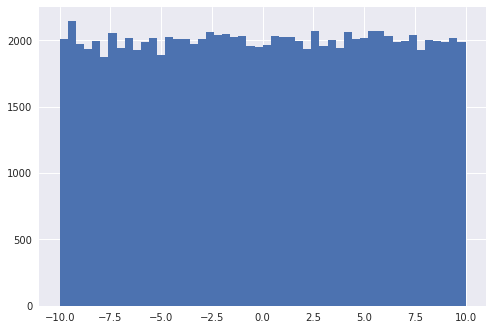

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
values = np.random.uniform(-10.0, 10.0, 100_000)
plt.hist(values, 50)

plt.show()

We can see that there is an equal chance of any given value or range of values occurring in that data.  Unlike the normal distribution with concentration of values near the mean, a uniform distribution has equal probability across any given value within the range that you define.(-10 to 10 in this case. We can normalize the values in the histogram above to see the probability of these values which will be almost equal to 0.05. 

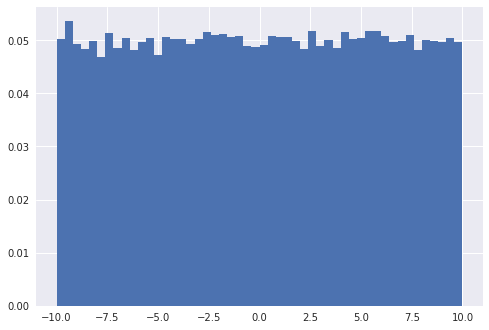

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.hist(values, 50, density=True)

plt.show()

## Gaussian Distributions

We have seen seen normal/Gaussian repeatedly. For Gaussian distribution, the probability function is calculated as:

$$
\rho_{Gaussian}(v) = \dfrac{1}{\sqrt{2 \pi \sigma}} e^{-\frac{v^2}{2\sigma^2}}
$$
 
Where Mean of Gaussian distribution is $\mu$, and standard deviation is $\sigma$.

We can visualize Gaussian distributions with a function called pdf (probability density function) in the
scipy.stats.norm package function.

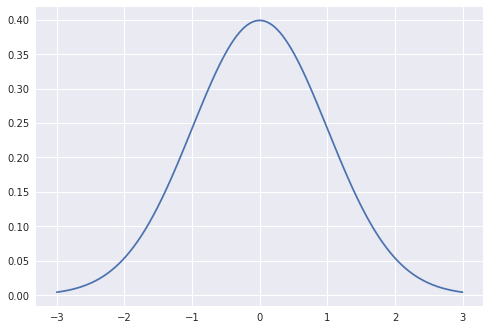

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x));

Here, we are creating a list of x values for plotting that range between -3 and 3 with an
increment of 0.001 in between them by using the `arange `function. These are the x values on the graph and
we plotted the x-axis with using those values. 

The y-axis is the normal function, `norm.pdf`, i.e., the PDF for a normal distribution, on the x values.

The PDF function plots a normal distribution for the given numbers that we provided, where 0 represents the mean, and the numbers -3, -2,-1, 1, 2, and 3 are standard deviations. We can also generate random numbers with a normal distribution using `random.normal` function from NumPy. The first parameter `mu` represents the mean that you want to center the data around and `sigma` is the standard deviation of that data. Then, we specify the number of data points to be generated, which is 10000 here. 

So that's a way to use a probability distribution function, in this case the normal distribution function, to generate a set of random data. We can then plot that, using a histogram broken into 50 buckets and show it. 

as shown in following code:

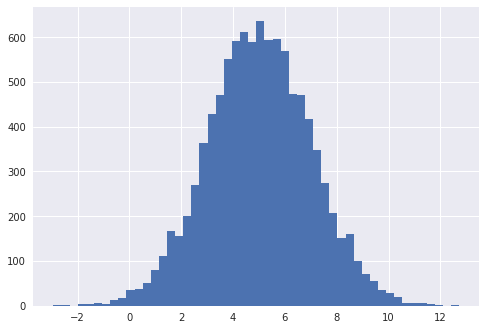

In [6]:
mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10_000)
plt.hist(values, 50)
plt.show()

It does look more or less like a normal distribution, but since there is a random element, it's not going to
be a perfect curve. We can, however, use `seaborn` to get the KDE which is a good PDF estimation and gives us a smooth PDF, while normalizing all values. 


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


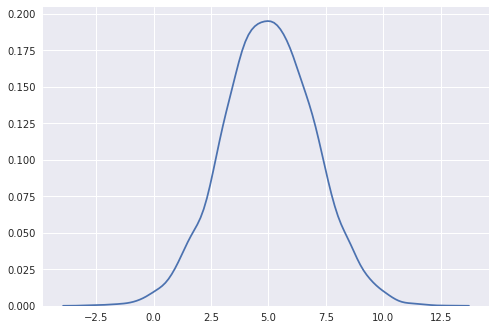

In [7]:
import seaborn as sns
sns.kdeplot(values);

We can further inspect cumulative Density functions (CDFs) for a given normal dataset in seaborn as shown below:


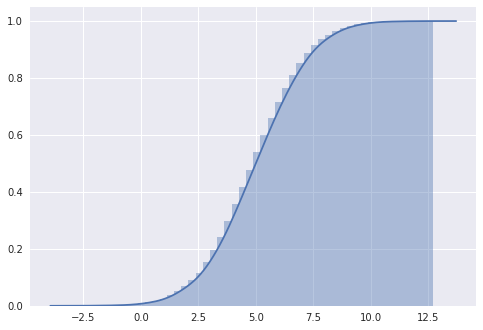

In [9]:
sns.distplot(values,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True));

## Exponential Distribution

Another common distribution function is the exponential probability distribution function, where things fall off in an exponential manner, with which we expect to see a curve, where it's very likely for something
to happen, near zero, but then, as you get farther away from it, it drops off very quickly. There's a lot of
things in nature that behave in this manner. The probability function of an Exponential Distribution is shown as:

$$
\rho_{exponential}(t) = \dfrac{ e^{-\frac{t}{\tau}} }{ \tau } \mbox{ for } t \geq 0
$$

Here mean of the exponential distribution is $\tau$, and the standard deviation $\sigma = \tau$ too. The variance is $\tau^2$.

To implement this in Python, we have an expon.pdf function we can use.

Let's create our x values using the NumPy `arange` function to create some values between 0 and 10 with a step size of 0.001. We can then plot those x values against the y-axis, which is defined as the function expon.pdf(x). The output looks like an exponential fall off. We can do the same syntax that we did for the normal distribution with an exponential distribution as shown below:

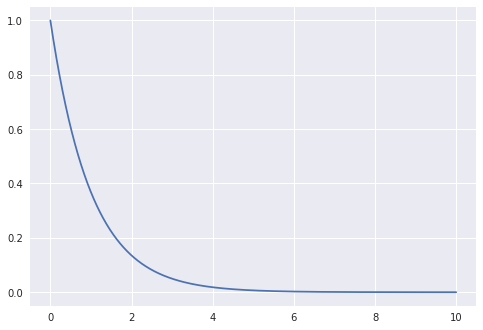

In [10]:
from scipy.stats import expon
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x));

## Poisson Distribution

Poisson probability mass function, looks a lot like a normal distribution, but it's a little bit different. If we have some information about the average number of things that happen in a given time period, this probability mass function can give you a way to predict the odds of getting another value instead, on a given future day.

<img src="psn.png" width=100>


here $\lambda$ is the average number of events, and X is the number of successes. 

As an example, let's say we have a website with an average of 500 visitors per day. We can use the Poisson
probability mass function to estimate the probability of seeing some other value on a specific day. For
example,  average of 500 visitors per day, what's the odds of seeing 550 visitors on a given day?
That's what a Poisson probability mass function gives us. 

So we'll set our average to 500 mu, and generate some x values to look at between 400 and 600 with a spacing of 0.5. We shall plot this data using the poisson.pmf function. We can then use that plot to look up the odds of getting any specific value that's not 500, assuming a normal distribution


Let's see the above in Python:

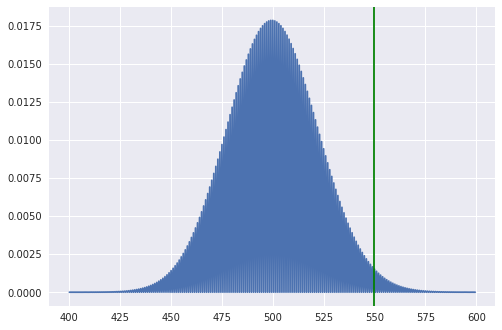

In [11]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
mu = 500
x = np.arange(400, 600, 0.5)
plt.plot(x, poisson.pmf(x, mu))
plt.axvline(550, color= 'g');

So this shows a very low probability: the odds of seeing 550 visitors on a given day, it turns out, comes out to about 0.002 or 0.2% probability.

We shall revisit these and maybe some other distributions repeatedly through rest of our course. I|t is imperative that you have a clear understanding of the probability functions for these distributions, their implementation in python and the interpretation of their probability functions. 

Below is a quick reference sheet you can consult while formulating data distributions:
![](cheat.jpg)

## Summary

In this lesson, we revised and summarized some of the discrete and continuous probability distributions that we had already covered earlier in the course. The aim of this lesson was to get a good revision before we start using these (and other) distributions in a machine learning context. 